# 📊 COVID-19 Global Data Tracker
This notebook performs data loading, analysis, and visualization for a COVID-19 dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
try:
    df = pd.read_csv("owid-covid-data.csv")  
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")

✅ Dataset loaded successfully.


In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
print(f"📐 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("🗂️ Columns in the dataset:")
print(df.columns.tolist())

print("\n📊 Dataset Info:")
df.info()

print("\n🔍 Missing Values:")
print(df.isnull().sum())

📐 Dataset contains 429435 rows and 67 columns.

🗂️ Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'peo

In [14]:
# Keep only rows with essential columns (e.g., date, location, new_cases)
df_clean = df[['date', 'location', 'continent', 'total_cases', 'new_cases', 'total_deaths', 'total_vaccinations']].copy()

# Drop rows where critical values are missing
df_clean = df_clean.dropna(subset=['date', 'location', 'total_cases', 'new_cases'])

# Convert date to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])


In [15]:
df_clean.describe()

,date,total_cases,new_cases,total_deaths,total_vaccinations
count,410159,4.101590e+05,4.101590e+05,4.101590e+05,7.353200e+04
mean,2022-04-17 23:45:09.161081600,7.195224e+06,8.017360e+03,7.988519e+04,4.490111e+08
min,2020-01-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-02-24 00:00:00,6.246000e+03,0.000000e+00,4.200000e+01,1.608065e+06
50%,2022-04-17 00:00:00,6.279100e+04,0.000000e+00,7.780000e+02,1.190936e+07
75%,2023-06-08 00:00:00,7.294750e+05,0.000000e+00,9.366000e+03,8.627381e+07
max,2024-08-04 00:00:00,7.758668e+08,4.423623e+07,7.057132e+06,1.357876e+10
std,NaN,4.473250e+07,2.296649e+05,4.406246e+05,1.809732e+09


In [16]:
grouped = df_clean.groupby("continent")["total_cases"].mean().sort_values(ascending=False)
print(grouped)

continent
Asia             3.205125e+06
South America    3.135671e+06
Europe           2.382822e+06
North America    1.193092e+06
Oceania          2.887070e+05
Africa           1.531938e+05
Name: total_cases, dtype: float64


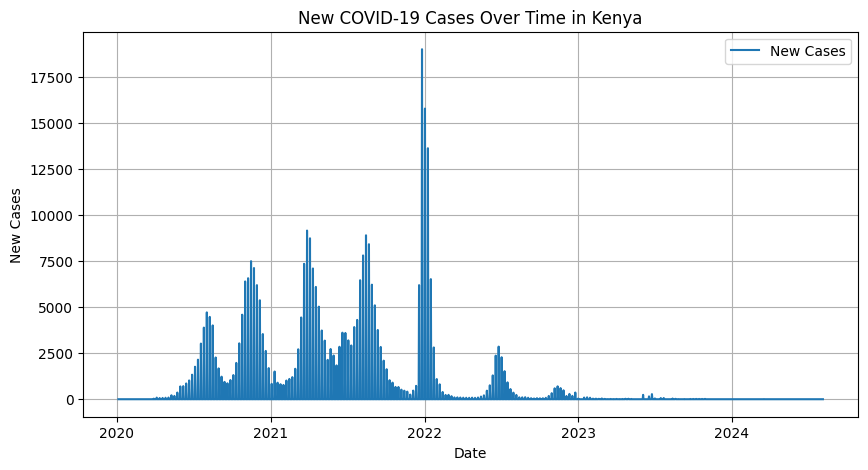

In [17]:
country_data = df_clean[df_clean['location'] == 'Kenya'].copy()
country_data['new_cases'] = country_data['new_cases'].fillna(0)

plt.figure(figsize=(10,5))
plt.plot(country_data['date'], country_data['new_cases'], label='New Cases')
plt.title("New COVID-19 Cases Over Time in Kenya")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.legend()
plt.show()


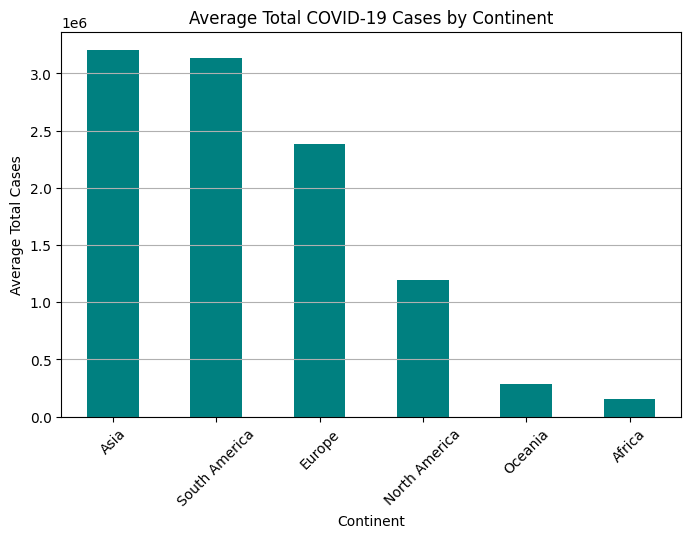

In [18]:
plt.figure(figsize=(8,5))
grouped.plot(kind='bar', color='teal')
plt.title("Average Total COVID-19 Cases by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Total Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

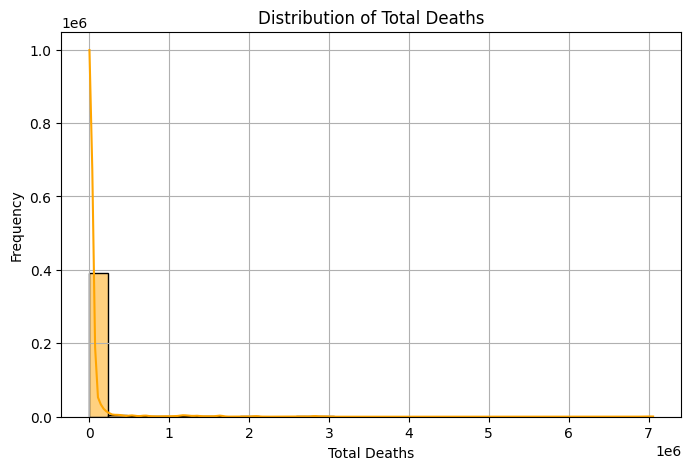

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['total_deaths'], kde=True, bins=30, color='orange')
plt.title("Distribution of Total Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\Eileen\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


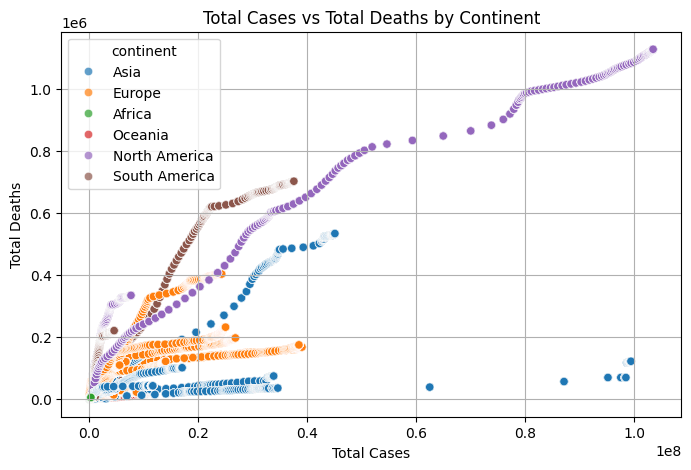

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="total_cases", y="total_deaths", hue="continent", alpha=0.7)
plt.title("Total Cases vs Total Deaths by Continent")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

## 🔍 Key Observations

- There is a clear positive correlation between total cases and total deaths.
- Africa and Asia generally report fewer cases and deaths compared to Europe and America.
- Kenya's daily new cases showed peaks around certain dates which may indicate waves of infections.